In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [3]:
data = pd.read_csv(r'/content/bank_data.csv')

In [4]:
data.shape

(1882, 6)

In [4]:
data.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [5]:
# Extract the numeric part of the 'recovery_strategy' column and add extracost column to know how much bankincurs in each stage
data['threshold'] = data['recovery_strategy'].str.extract('(\d+)').astype(int)
data['extra_cost'] = (data['threshold'] - 1) * 50

# Fit a regression model
model = smf.ols(formula='actual_recovery_amount ~ extra_cost', data=data)
results = model.fit()

# Print the regression summary
print(results.summary())







                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.643
Model:                                OLS   Adj. R-squared:                  0.643
Method:                     Least Squares   F-statistic:                     3387.
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                            15:51:54   Log-Likelihood:                -17563.
No. Observations:                    1882   AIC:                         3.513e+04
Df Residuals:                        1880   BIC:                         3.514e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data for the specified range of Expected Recovery Amounts
filtered_data = data[(data['expected_recovery_amount'] >= 0) & (data['expected_recovery_amount'] <= 2000)]




In [7]:
data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,threshold,extra_cost
0,2030,194,263.540000,Level 0 Recovery,19,Male,0,-50
1,1150,486,416.090000,Level 0 Recovery,25,Female,0,-50
2,380,527,429.350000,Level 0 Recovery,27,Male,0,-50
3,1838,536,296.990000,Level 0 Recovery,25,Male,0,-50
4,1995,541,346.385000,Level 0 Recovery,34,Male,0,-50
...,...,...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female,4,150
1878,196,9857,9709.909257,Level 4 Recovery,68,Female,4,150
1879,313,9859,30209.181790,Level 4 Recovery,58,Female,4,150
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female,4,150


In [8]:
filtered_data

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex,threshold,extra_cost
0,2030,194,263.540000,Level 0 Recovery,19,Male,0,-50
1,1150,486,416.090000,Level 0 Recovery,25,Female,0,-50
2,380,527,429.350000,Level 0 Recovery,27,Male,0,-50
3,1838,536,296.990000,Level 0 Recovery,25,Male,0,-50
4,1995,541,346.385000,Level 0 Recovery,34,Male,0,-50
...,...,...,...,...,...,...,...,...
912,1282,1988,1475.957452,Level 1 Recovery,28,Female,1,0
913,1879,1988,2508.799693,Level 1 Recovery,34,Female,1,0
914,922,1990,2072.971170,Level 1 Recovery,40,Male,1,0
915,1025,1992,1364.515730,Level 1 Recovery,23,Male,1,0


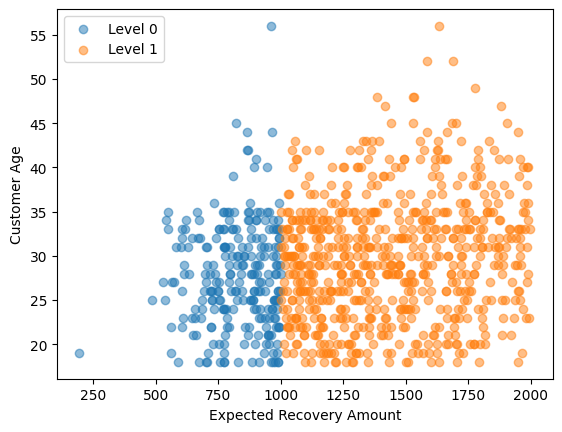

In [9]:
# Separate the data for Level 0 and Level 1
level_0_data = filtered_data[filtered_data['recovery_strategy'] == 'Level 0 Recovery']
level_1_data = filtered_data[filtered_data['recovery_strategy'] == 'Level 1 Recovery']

# Create scatter plots for each level
plt.scatter(level_0_data['expected_recovery_amount'], level_0_data['age'], label='Level 0', alpha=0.5)
plt.scatter(level_1_data['expected_recovery_amount'], level_1_data['age'], label='Level 1', alpha=0.5)

# Add labels and a legend
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Customer Age')
plt.legend()

# Show the plot
plt.show()

In [10]:
import pandas as pd
from scipy import stats


# Define the threshold
threshold = 1000

# Define the range for analysis
lower_limit = threshold - 100
upper_limit = threshold + 100

# Filter the data for the specified range of Expected Recovery Amounts
filtered_data = data[(data['expected_recovery_amount'] >= lower_limit) & (data['expected_recovery_amount'] <= upper_limit)]

# Separate the data for just above and just below the threshold
above_threshold = filtered_data[filtered_data['expected_recovery_amount'] > threshold]
below_threshold = filtered_data[filtered_data['expected_recovery_amount'] < threshold]

# Perform a t-test to compare the average age
t_stat, p_value = stats.ttest_ind(above_threshold['age'], below_threshold['age'])

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Determine if the difference is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The difference in average age is statistically significant.")
else:
    print("There is no statistically significant difference in average age.")


T-statistic: 1.6142056008618746
P-value: 0.10822479656694209
There is no statistically significant difference in average age.


In [11]:

import pandas as pd
from scipy.stats import chi2_contingency


# Define the threshold
threshold = 1000

# Define the range for analysis
lower_limit = threshold - 100
upper_limit = threshold + 100

# Create a binary variable to indicate whether expected_recovery_amount is above or below the threshold
data['above_threshold'] = data['expected_recovery_amount'] > threshold

# Filter the data for the specified range of Expected Recovery Amounts
filtered_data = data[(data['expected_recovery_amount'] >= lower_limit) & (data['expected_recovery_amount'] <= upper_limit)]

# Create a contingency table
contingency_table = pd.crosstab(filtered_data['sex'], filtered_data['above_threshold'])

# Perform a chi-squared test for independence
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

# Determine if the difference is statistically significant
alpha = 0.05
if p < alpha:
    print("The difference in the percentage of males is statistically significant.")
else:
    print("There is no statistically significant difference in the percentage of males.")




Chi-squared statistic: 0.49435761688866475
P-value: 0.48198988397369014
There is no statistically significant difference in the percentage of males.


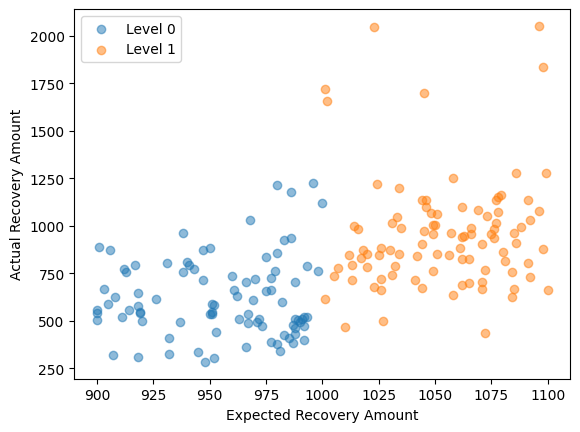

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the threshold
threshold = 1000

# Define the range for analysis
lower_limit = 900
upper_limit = 1100

# Filter the data for the specified range of Expected Recovery Amounts
filtered_data = data[(data['expected_recovery_amount'] >= lower_limit) & (data['expected_recovery_amount'] <= upper_limit)]

# Separate the data for Level 0 and Level 1
level_0_data = filtered_data[filtered_data['recovery_strategy'] == 'Level 0 Recovery']
level_1_data = filtered_data[filtered_data['recovery_strategy'] == 'Level 1 Recovery']

# Create a scatter plot for Level 0
plt.scatter(level_0_data['expected_recovery_amount'], level_0_data['actual_recovery_amount'], label='Level 0', alpha=0.5)

# Create a scatter plot for Level 1
plt.scatter(level_1_data['expected_recovery_amount'], level_1_data['actual_recovery_amount'], label='Level 1', alpha=0.5)

# Add labels and a legend
plt.xlabel('Expected Recovery Amount')
plt.ylabel('Actual Recovery Amount')
plt.legend()

# Show the plot
plt.show()


In [13]:
import pandas as pd
from scipy.stats import kruskal


# Define the threshold
threshold = 1000

# Define the ranges for analysis
range_1 = (900 <= data['expected_recovery_amount']) & (data['expected_recovery_amount'] <= 1100)
range_2 = (950 <= data['expected_recovery_amount']) & (data['expected_recovery_amount'] <= 1050)

# Separate the data for Level 0 and Level 1 within each range
level_0_data_range_1 = data[(range_1) & (data['recovery_strategy'] == 'Level 0 Recovery')]
level_1_data_range_1 = data[(range_1) & (data['recovery_strategy'] == 'Level 1 Recovery')]
level_0_data_range_2 = data[(range_2) & (data['recovery_strategy'] == 'Level 0 Recovery')]
level_1_data_range_2 = data[(range_2) & (data['recovery_strategy'] == 'Level 1 Recovery')]

# Perform Kruskal-Wallis tests
_, p_value_1 = kruskal(level_0_data_range_1['actual_recovery_amount'], level_1_data_range_1['actual_recovery_amount'])
_, p_value_2 = kruskal(level_0_data_range_2['actual_recovery_amount'], level_1_data_range_2['actual_recovery_amount'])

# Print the results
print("Kruskal-Wallis p-value for the range $900-$1100:", p_value_1)
print("Kruskal-Wallis p-value for the range $950-$1050:", p_value_2)

# Determine if the difference is statistically significant
alpha = 0.05
if p_value_1 < alpha:
    print("There is a statistically significant difference in actual recovery amount for the range $900-$1100.")
else:
    print("There is no statistically significant difference in actual recovery amount for the range $900-$1100.")

if p_value_2 < alpha:
    print("There is a statistically significant difference in actual recovery amount for the range $950-$1050.")
else:
    print("There is no statistically significant difference in actual recovery amount for the range $950-$1050.")


Kruskal-Wallis p-value for the range $900-$1100: 7.886077128395961e-16
Kruskal-Wallis p-value for the range $950-$1050: 2.5902913533269003e-08
There is a statistically significant difference in actual recovery amount for the range $900-$1100.
There is a statistically significant difference in actual recovery amount for the range $950-$1050.


In [14]:
import pandas as pd
import statsmodels.api as sm


# Define the independent variable (X) and dependent variable (y)
X = data['expected_recovery_amount']
y = data['actual_recovery_amount']

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                            15:55:19   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [15]:
import pandas as pd
import statsmodels.api as sm


# Define the independent variable (X) and dependent variable (y)
X = data['expected_recovery_amount']
y = data['actual_recovery_amount']

# Define the threshold
threshold = 1000

# Add a constant term to the independent variable
X = sm.add_constant(X)

# Create an indicator variable for above and below the threshold
X['above_threshold'] = (data['expected_recovery_amount'] > threshold).astype(int)

# Fit a segmented regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.819
Model:                                OLS   Adj. R-squared:                  0.818
Method:                     Least Squares   F-statistic:                     4242.
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):               0.00
Time:                            15:55:36   Log-Likelihood:                -16926.
No. Observations:                    1882   AIC:                         3.386e+04
Df Residuals:                        1879   BIC:                         3.387e+04
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [16]:
import pandas as pd
import statsmodels.api as sm

# Define the independent variable (X) and dependent variable (y)
X = data['expected_recovery_amount']
y = data['actual_recovery_amount']

# Define the threshold
threshold = 1000

# Define the range for analysis (from $950 to $1050)
lower_limit = 950
upper_limit = 1050

# Filter the data for the specified range of Expected Recovery Amounts
filtered_data = data[(data['expected_recovery_amount'] >= lower_limit) & (data['expected_recovery_amount'] <= upper_limit)]

# Add a constant term to the independent variable
X = sm.add_constant(filtered_data['expected_recovery_amount'])

# Create an indicator variable for above and below the threshold
X['above_threshold'] = (filtered_data['expected_recovery_amount'] > threshold).astype(int)

# Fit a segmented regression model
model = sm.OLS(filtered_data['actual_recovery_amount'], X).fit()

# Print the regression results
print(model.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Sat, 07 Oct 2023   Prob (F-statistic):           2.42e-07
Time:                            15:55:41   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------